In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tslearn


In [2]:
silver_df = pd.read_csv("silverdatafirda.csv", sep = ",")
gas_df = pd.read_csv("gasdatafirda.csv", sep = ",")
gas_df.head()

,Id,gasdate,openprice,highprice,lowprice,closeprice,volume,created_at
0,1,2015-04-21 00:00:00,2.549,2.597,2.533,2.575,103646,2019-05-29 22:51:51
1,2,2015-04-22 00:00:00,2.571,2.622,2.554,2.606,83370,2019-05-29 22:51:51
2,3,2015-04-23 00:00:00,2.602,2.605,2.520,2.531,133446,2019-05-29 22:51:51
3,4,2015-04-24 00:00:00,2.546,2.561,2.518,2.531,39874,2019-05-29 22:51:51
4,5,2015-04-27 00:00:00,2.472,2.494,2.443,2.490,69051,2019-05-29 22:51:51


In [3]:
gas_df.index = pd.to_datetime(gas_df["gasdate"])
silver_df.index = pd.to_datetime(silver_df["silverdate"])
silver_df.head()

,Id,silverdate,openprice,highprice,lowprice,closeprice,volume,created_at
silverdate,,,,,,,,
2015-04-21,1,2015-04-21 00:00:00,15.920,15.920,15.920,16.002001,1,2019-05-29 22:51:25
2015-04-22,2,2015-04-22 00:00:00,15.791,15.791,15.791,15.791000,21232,2019-05-29 22:51:25
2015-04-23,3,2015-04-23 00:00:00,15.824,15.824,15.824,15.824000,20776,2019-05-29 22:51:25
2015-04-24,4,2015-04-24 00:00:00,15.631,15.631,15.631,15.631000,33272,2019-05-29 22:51:25
2015-04-26,5,2015-04-26 00:00:00,15.707,15.773,15.707,15.770000,0,2019-05-29 22:51:25


In [4]:
gas_df.drop(["Id", "gasdate"], axis=1, inplace=True)
silver_df.drop(["Id", "silverdate"], axis=1, inplace=True)


In [5]:
new_df = pd.concat([gas_df["highprice"], silver_df["highprice"]],
                   axis=1,
                   keys=["gasprice","silverprice"])
new_df.to_csv("stockdata.csv", sep=',', encoding='utf-8')
new_df


,gasprice,silverprice
2015-04-21,2.597,15.920000
2015-04-22,2.622,15.791000
2015-04-23,2.605,15.824000
2015-04-24,2.561,15.631000
2015-04-26,NaN,15.773000
2015-04-27,2.494,15.940000
2015-04-28,2.527,16.587000
2015-04-29,2.612,16.684999
2015-04-30,2.770,16.700001
2015-05-01,2.800,16.225000


In [6]:
repmv = new_df.ffill().bfill()
repmv

,gasprice,silverprice
2015-04-21,2.597,15.920000
2015-04-22,2.622,15.791000
2015-04-23,2.605,15.824000
2015-04-24,2.561,15.631000
2015-04-26,2.561,15.773000
2015-04-27,2.494,15.940000
2015-04-28,2.527,16.587000
2015-04-29,2.612,16.684999
2015-04-30,2.770,16.700001
2015-05-01,2.800,16.225000


In [21]:
repmv1 = repmv.loc['2019-04-01':'2019-04-30']

In [22]:
repmv1.to_csv("alldata.csv")

In [8]:
cov_mat = repmv.cov()
cov_mat

,gasprice,silverprice
gasprice,0.223712,0.084609
silverprice,0.084609,2.004539


In [9]:
corr_mat= repmv.corr()

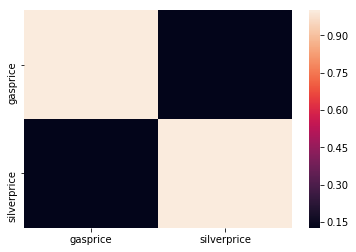

In [10]:
sns.heatmap(corr_mat)

In [11]:
import matplotlib.pyplot as plt

from tslearn.generators import random_walks
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation

In [12]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
dataset = scaler.fit_transform(repmv["silverprice"])

In [13]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(dataset))

In [14]:
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))


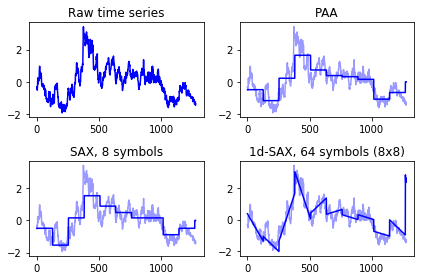

In [15]:
n_sax_symbols_avg = 8
n_sax_symbols_slope = 8
one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols_avg,
                                                alphabet_size_slope=n_sax_symbols_slope)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(one_d_sax.fit_transform(dataset))

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(dataset[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(dataset[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols (%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                                          n_sax_symbols_avg,
                                          n_sax_symbols_slope))

plt.tight_layout()
plt.show()